In [1]:
import scHash
import anndata as ad

from sklearn.metrics import f1_score, precision_score, recall_score
from statistics import median

# Tutorial for scRNA-seq annotation (6 pancreas) and the interpretability demonstration
We demonstrate how scHash encode multiple datasets into hash codes for six public avaialble Pancreas datasets.

The raw data for first five datasets can be obtained from [Harmony](https://github.com/immunogenomics/harmony2019/tree/master/data/figure5).

The sixth Pancreas dataset is public available at GSE83139.

We compiled the six datasets into one AnnData object for easy demonstration. The processed data can be downloaded [here](https://drive.google.com/file/d/1shc4OYIbq2FwbyGUaYuzizuvzW-giSTs/view?usp=share_link).

## Load data

In [2]:
# define data path
data_dir = '../../../../share_data/Pancreas_Wang/fivepancreas_wang_raw.h5ad'

# set up datamodule
# This anndata object is packed with 6 pancreas dataset. We take one of them to be the test dataset here.  
query = 'indrop'
full = ad.read_h5ad(data_dir)

train = full[full.obs.dataset!=query]
test = full[full.obs.dataset==query]

## Training Model

In [ ]:
# set up the training datamodule
datamodule = scHash.setup_training_data(train_data = train,cell_type_key = 'cell_type', batch_key = 'dataset')

# set a directory to save the model 
checkpointPath = '../checkpoint/'

# initiliza scHash model and train 
model = scHash.scHashModel(datamodule)
trainer, best_model_path, training_time = scHash.training(model = model, datamodule = datamodule, checkpointPath = checkpointPath, max_epochs = 50)

## Test Model

In [4]:
# add the test data
datamodule.setup_test_data(test)

# test the model
pred_labels, hash_codes = scHash.testing(trainer, model, best_model_path)

# show the test performance
labels_true = test.obs.cell_type
f1_median = round(median(f1_score(labels_true,pred_labels,average=None)),3)

print(f'F1 Median: {f1_median}')

F1 Median: 0.965


# Interpretability

The package offers interpretability analysis of each query cell. The `compute_cell_composition` function takes `trainer`, `best_model_path`, `model` as input and will analyze the closest K cell compositions (e.g., dataset, cell type) for user. The `plot_component` function will further help users visulize the compositions.

In [6]:
df_celltype, df_batch = scHash.compute_cell_composition(trainer, best_model_path, model)

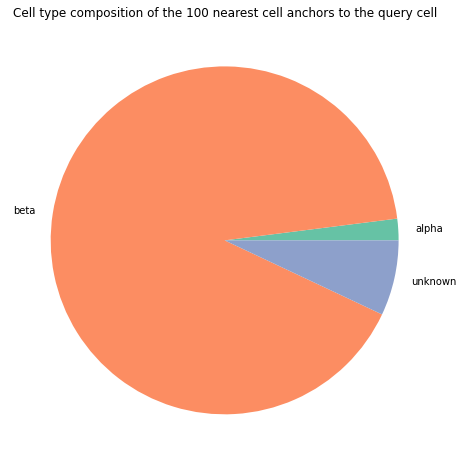

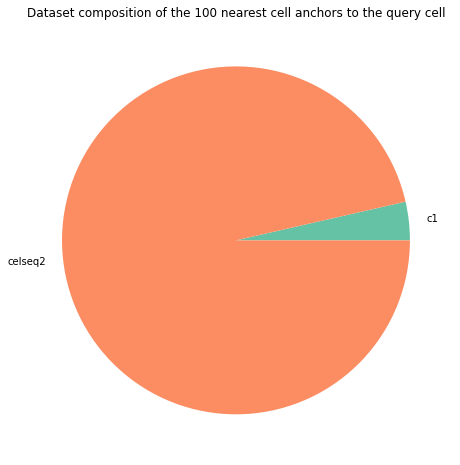

In [8]:
scHash.plot_component(df_celltype, df_batch,trainer,nth_query=100)